# Telecom Churn Prediction | Neural Network Classifier

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Load preprocessed data

In [2]:
df_preprocessed = pd.read_csv('../data/processed/preprocessed_telco.csv')

In [3]:
df_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0.217564,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0.012453,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0.211951,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.027778,0.521891,0.017462,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Independent and Dependent variables

In [4]:
X = df_preprocessed.drop('Churn_Yes', axis=1)
y = df_preprocessed['Churn_Yes']

In [5]:
y.value_counts()

Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

## Converting data to numpy arrays

In [6]:
X = X.values
y = y.values

## Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


## Hanlde class imbalance 

In [9]:
from sklearn.utils import class_weight

In [10]:
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [11]:
class_weights_dict = dict(enumerate(class_weights))

## Neural Network Model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='gelu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [14]:
model.compile(
    optimizer=optimizer,
    loss = tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [15]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [16]:
history = model.fit(
    x_train,
    y_train, 
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7153 - auc: 0.7238 - loss: 0.6767 - val_accuracy: 0.7187 - val_auc: 0.7751 - val_loss: 0.6052
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7379 - auc: 0.8043 - loss: 0.6102 - val_accuracy: 0.7169 - val_auc: 0.7954 - val_loss: 0.5721
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7157 - auc: 0.8054 - loss: 0.5684 - val_accuracy: 0.7223 - val_auc: 0.8074 - val_loss: 0.5646
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7357 - auc: 0.8290 - loss: 0.5432 - val_accuracy: 0.7205 - val_auc: 0.8131 - val_loss: 0.5599
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7538 - auc: 0.8475 - loss: 0.5215 - val_accuracy: 0.7178 - val_auc: 0.8162 - val_loss: 0.5681
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7552 - auc: 0.8394 - loss: 0.5260 - val_accuracy: 0.7214 - val_auc: 0.8184 - val_loss: 0.5607
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 

## Evaluate the Model

### Plot loss

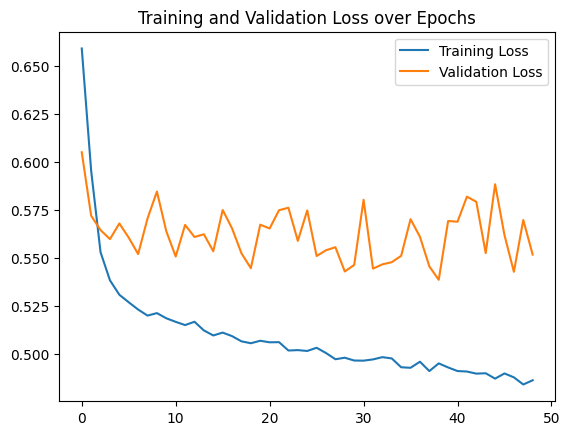

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

### Test Accuracy

In [18]:
test_loss, test_acc, test_auc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}, Test AUC: {test_auc:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7571 - auc: 0.8373 - loss: 0.5263
Test Accuracy: 0.7622, Test AUC: 0.8374


In [19]:
y_pred_prob = model.predict(x_test)

y_pred = (y_pred_prob > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


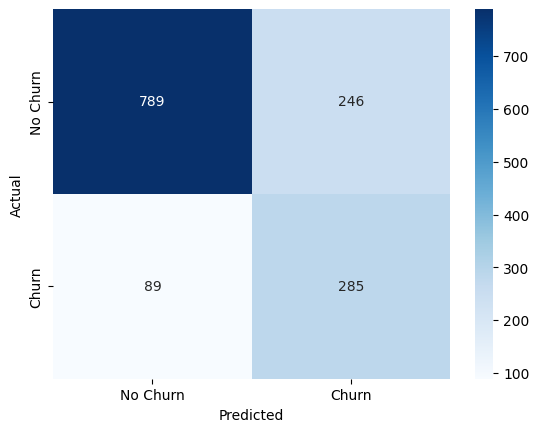

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Plot ROC Curve

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC score: 0.8373608204810251


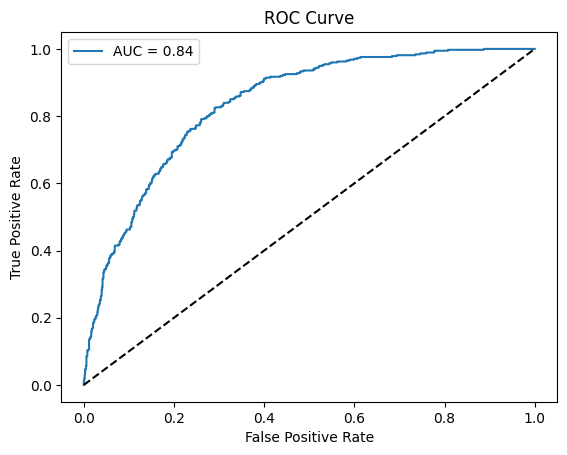

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Tuning the Model

Performing Hyperparameter tuning with keras-tuner

In [22]:
import keras_tuner as kt

In [23]:
def build_model(hp):
    model = tf.keras.Sequential()

    hp_layer_1 = hp.Int('units_1', min_value=32, max_value=256, step=32)
    hp_layer_2 = hp.Int('units_2', min_value=16, max_value=256, step=32)
    hp_activation = hp.Choice('activation', values=['relu', 'selu', 'tanh', 'gelu'])
    hp_l2 = hp.Float('l2_regularization', min_value=1e-6, max_value=1e-3, sampling='LOG')
    hp_dropout = hp.Float('dropout', min_value=0.0, max_value=0.3, step=0.05)
    hp_learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-3, sampling='LOG')
    hp_label_smoothing = hp.Float('label_smoothing', min_value=0.0, max_value=0.3, step=0.05)

    model.add(tf.keras.layers.Dense(
        hp_layer_1,
        activation=hp_activation,
        kernel_regularizer=tf.keras.regularizers.l2(hp_l2),
        input_shape=(x_train.shape[1],)
    ))

    model.add(tf.keras.layers.Dropout(hp_dropout))

    model.add(tf.keras.layers.Dense(
        hp_layer_2,
        activation=hp_activation,
        kernel_regularizer=tf.keras.regularizers.l2(hp_l2)
    ))

    model.add(tf.keras.layers.Dropout(hp_dropout))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=hp_learning_rate)
    loss = tf.keras.losses.BinaryCrossentropy(label_smoothing=hp_label_smoothing)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    return model

In [24]:
tuner = kt.Hyperband(
    build_model,
    objective='val_auc',
    max_epochs=50,
    factor=3,
    directory='hyperband_tuning',
    project_name='telco_churn_nn'
)

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
stop_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

In [26]:
tuner.search(
    x_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[stop_early]
)

Trial 90 Complete [00h 00m 06s]
val_auc: 0.8229669332504272

Best val_auc So Far: 0.8274140954017639
Total elapsed time: 00h 07m 15s


### Display the best model details

In [27]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [28]:
for hp_name, hp_value in best_hps.values.items():
    print(f"{hp_name}: {hp_value}")

units_1: 192
units_2: 48
activation: gelu
l2_regularization: 1.9016382411238234e-06
dropout: 0.25
learning_rate: 0.0006695608114388133
label_smoothing: 0.2
tuner/epochs: 17
tuner/initial_epoch: 6
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0064


## Retraining the model

In [30]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, 
                    epochs=50, 
                    validation_split=0.2,
                    callbacks=[stop_early])

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7551 - auc: 0.7097 - loss: 0.5808 - val_accuracy: 0.7906 - val_auc: 0.8195 - val_loss: 0.5463
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - auc: 0.8352 - loss: 0.5398 - val_accuracy: 0.7968 - val_auc: 0.8212 - val_loss: 0.5453
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - auc: 0.8445 - loss: 0.5346 - val_accuracy: 0.7968 - val_auc: 0.8228 - val_loss: 0.5441
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8019 - auc: 0.8387 - loss: 0.5331 - val_accuracy: 0.7995 - val_auc: 0.8236 - val_loss: 0.5431
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7989 - auc: 0.8425 - loss: 0.5339 - val_accuracy: 0.7950 - val_auc: 0.8246 - val_loss: 0.5433
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - auc: 0.8464 - loss: 0.5285 - val_accuracy: 0.7924 - val_auc: 0.8236 - val_loss: 0.5446
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 

## Evaluating the New Model

### Plot loss

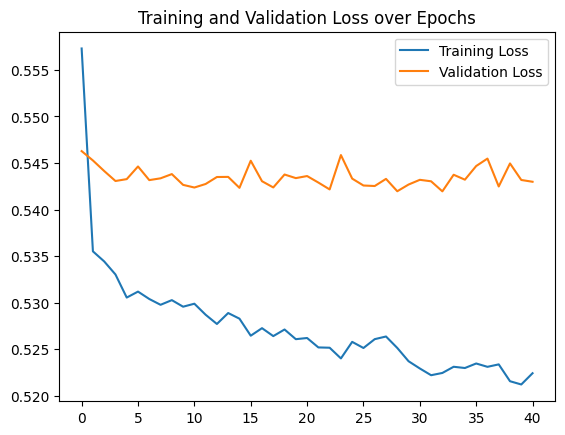

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

### Test Accuracy

In [32]:
test_loss, test_acc, test_auc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}\nTest AUC: {test_auc:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7860 - auc: 0.8361 - loss: 0.5419
Test Accuracy: 0.7949
Test AUC: 0.8405


In [33]:
y_pred_prob = model.predict(x_test)

y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report:

              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87      1035
       Churn       0.65      0.50      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



### Confusion Matrix

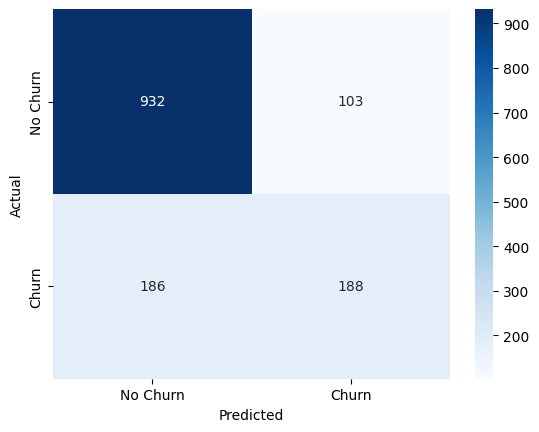

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC-AUC score: 0.8403756232400734


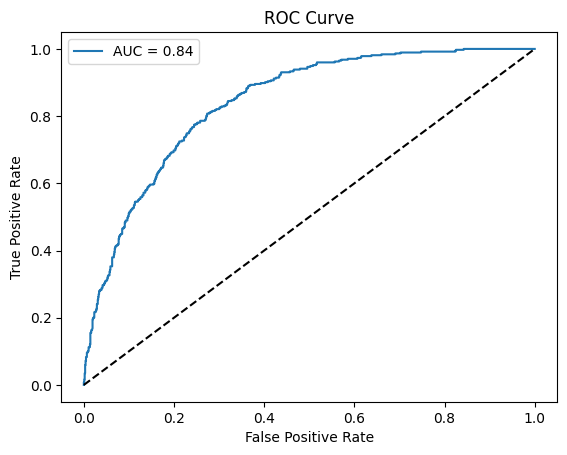

In [35]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()